## 질문zip
---
- sns.factorplot('Pclass','Survived',hue='Sex',data=data) 에서 factorplot을 더이상 지원하지 않아 나는 catplot으로 하였는데 다른 그루들은 어떻게 표현했는 지 궁금하다.
- plt.close(2) 이걸 하면 catplot 그래프 출력이 안 됨


## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 결측치 제거
data.isna().sum() # isnull() 과 같은 결과 출력

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# age, cabin, embarked 가 null값을 포함하므로 이를 수정.
# 수정하는 코드 어디?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## How many Survived??

In [8]:
# matplotlib와 seaborn을 사용하여 Survived (생존 여부) 에 대한 시각화를 2가지 형태로 보여주는 코드

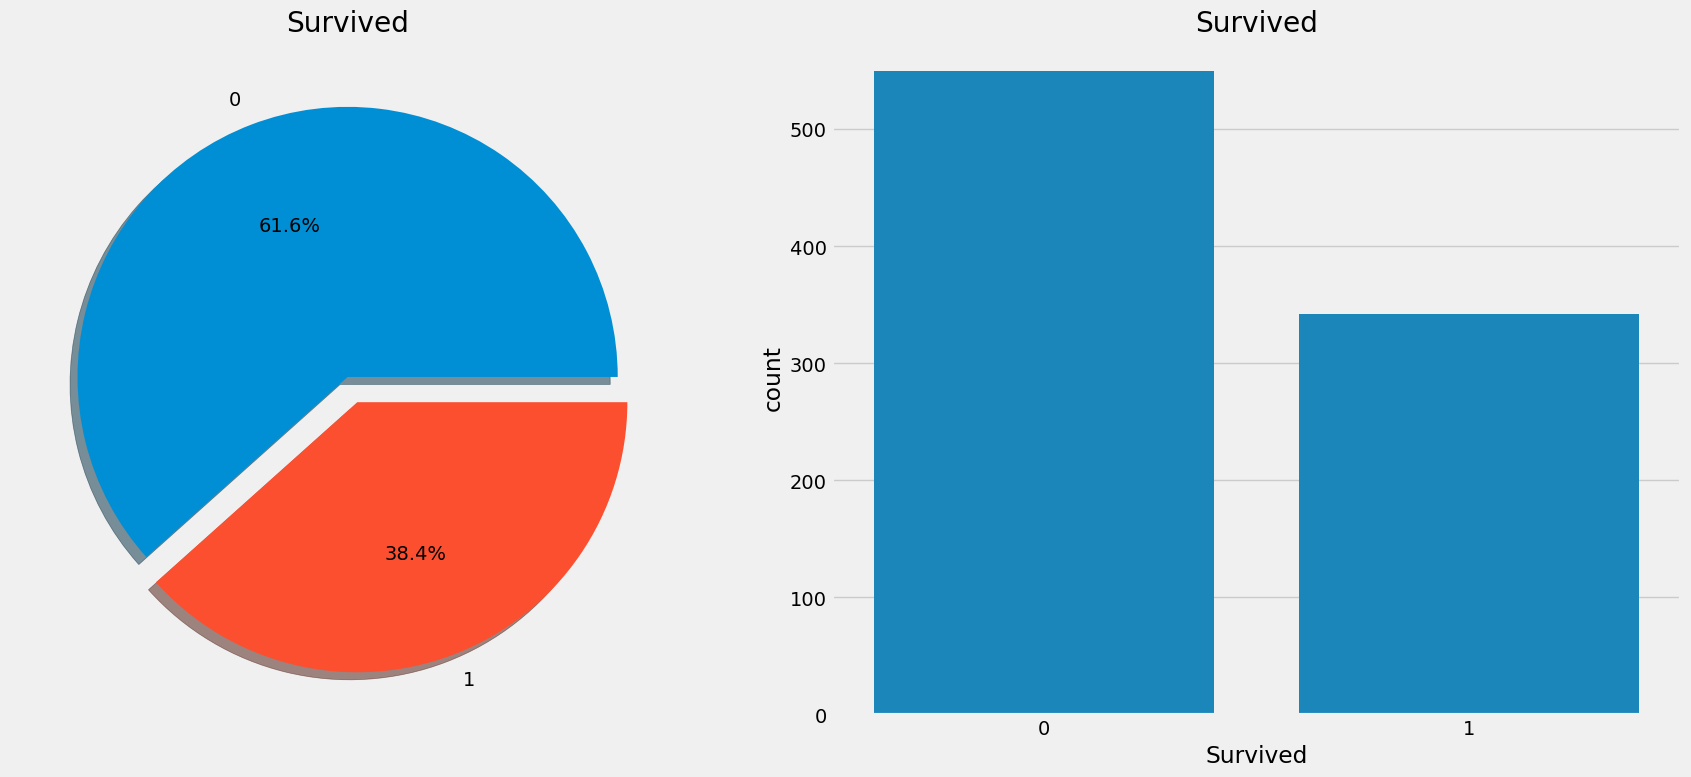

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# f는 전체 객체, ax는 각 subplot의 축(ax)를 담은 리스트
# 두 개의 그래프를 합치도록 subplots
# 1행 2열 형태

# 왼쪽: 파이 차트
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], # 생존쪽을 약간 띄워서 
    autopct='%.1f%%', # 소수점 첫째 자리까지 표시
    ax=ax[0], # 첫 번째 ax 요소에 그리기
    shadow=True # 그림자 가가
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 오른쪽: 막대 그래프
sns.countplot(x='Survived', data=data, ax=ax[1])
# countplot 범주형 데이터의 개수를 세어 막대 그래프로 시각화

ax[1].set_title('Survived')

f.tight_layout()
plt.show()

%.1f%% 에서 %%를 두 번 사용하는 이유?  
%자체도 출력하기 위함

## Analysing The Features  
### Sex--> Categorical Feature

In [10]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

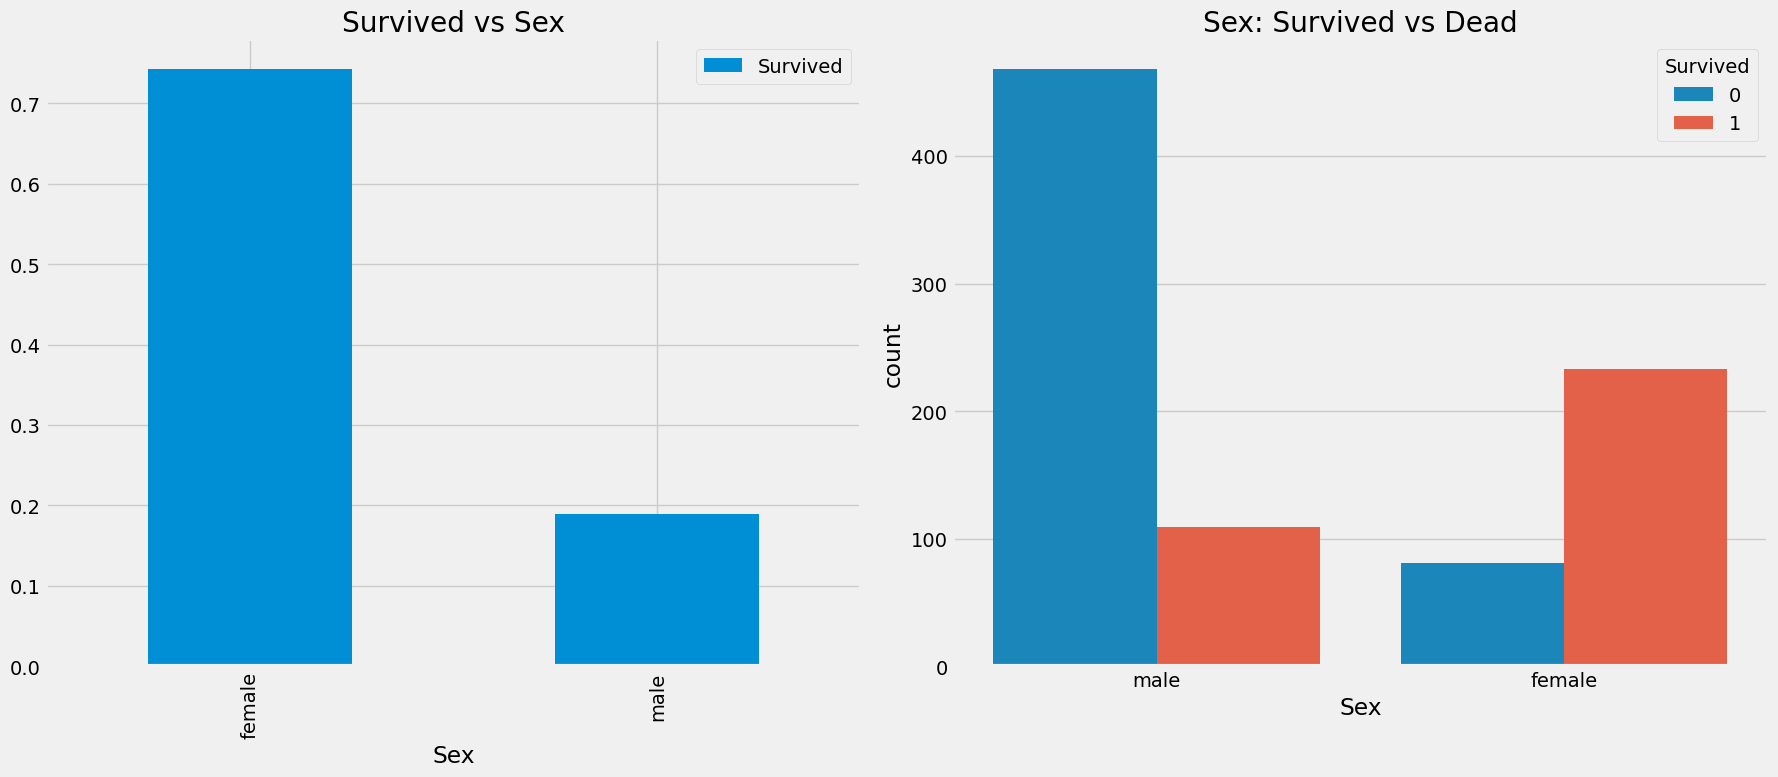

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
# hue 색깔로 그룹을 나누는 기준
ax[1].set_title('Sex: Survived vs Dead')

f.tight_layout()
plt.show()


✔️ countplot은 "각 생존 여부에 대한 개수만 시각화" 해줄 뿐, 전체 수는 따로 안 보여준다.

배에 탑승한 남성의 수가 여성보다 훨씬 많습니다.  
그런데도 구조된 여성의 수는 남성보다 거의 두 배에 달한다.  
여성의 생존률은 약 **75%**인 반면, 남성은 18~19% 정도이다.  
  
이건 모델링에 아주 중요한 특징(피처)처럼 보인다.  
다른 피처들도 확인해보겠다.


## Pclass --> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# margins = True 행과 열의 총합(All)을 같이 보여준다.
# style.background_gradient DataFrame에 색상 그라디언트를 입혀서 숫자 크기를 직관적으로 보이게 해준다.
# cmap='summer_r' 노랑~연두로 반대로 적용됨(color)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


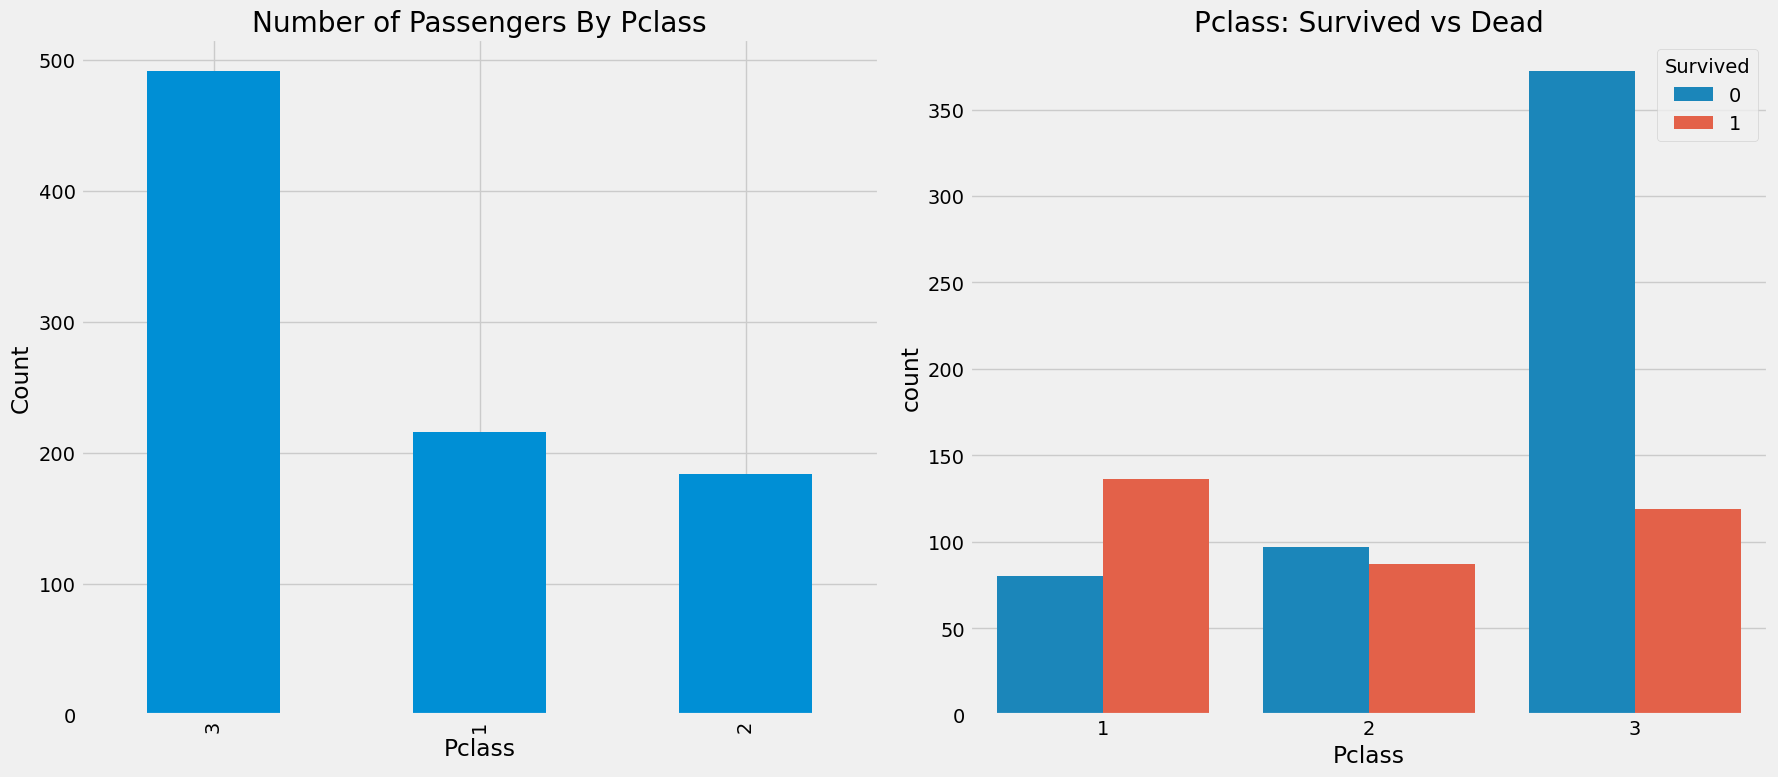

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

f.tight_layout()
plt.show()

🔍 인사이트  
Pclass와 생존률 데이터를 보면, 1등석 승객의 생존률이 높고, 3등석은 낮은 경향이 뚜렷하게 나타난다.  

따라서, 타이타닉 사고 당시 부유한 사람들이 구조 우선권을 부여받았고,  
상류층의 생존율이 높았다는 사회적, 경제적 불평등을 반영하는 중요한 인사이트가 될 수 있다.

In [14]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

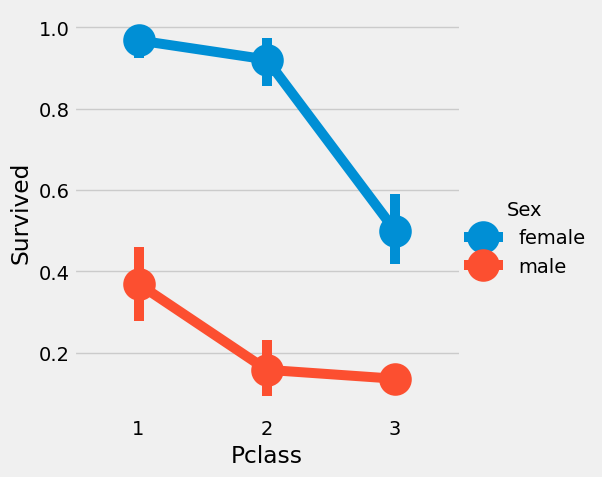

In [15]:
# sns.factorplot('Pclass','Survived',hue='Sex',data=data)
# 더이상 factorplot을 지원하지 않아 catplot으로 표현

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

🔍 인사이트  
Pclass와 관계없이, 여성은 구조 시 우선권을 받았다는 것이 분명하다.  
Pclass 1의 남성들조차 생존율이 매우 낮다.    
Pclass도 중요한 특징인 것 같다.  
성별과 Pclass가 구조 시 영향을 많이 받았다는 인사이트를 도출할 수 있다.

## Age--> Continous Feature

In [16]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',round(data['Age'].mean(),2),'Years') # 나이라서 소수점 둘째자리 까지 나오게 출력함

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


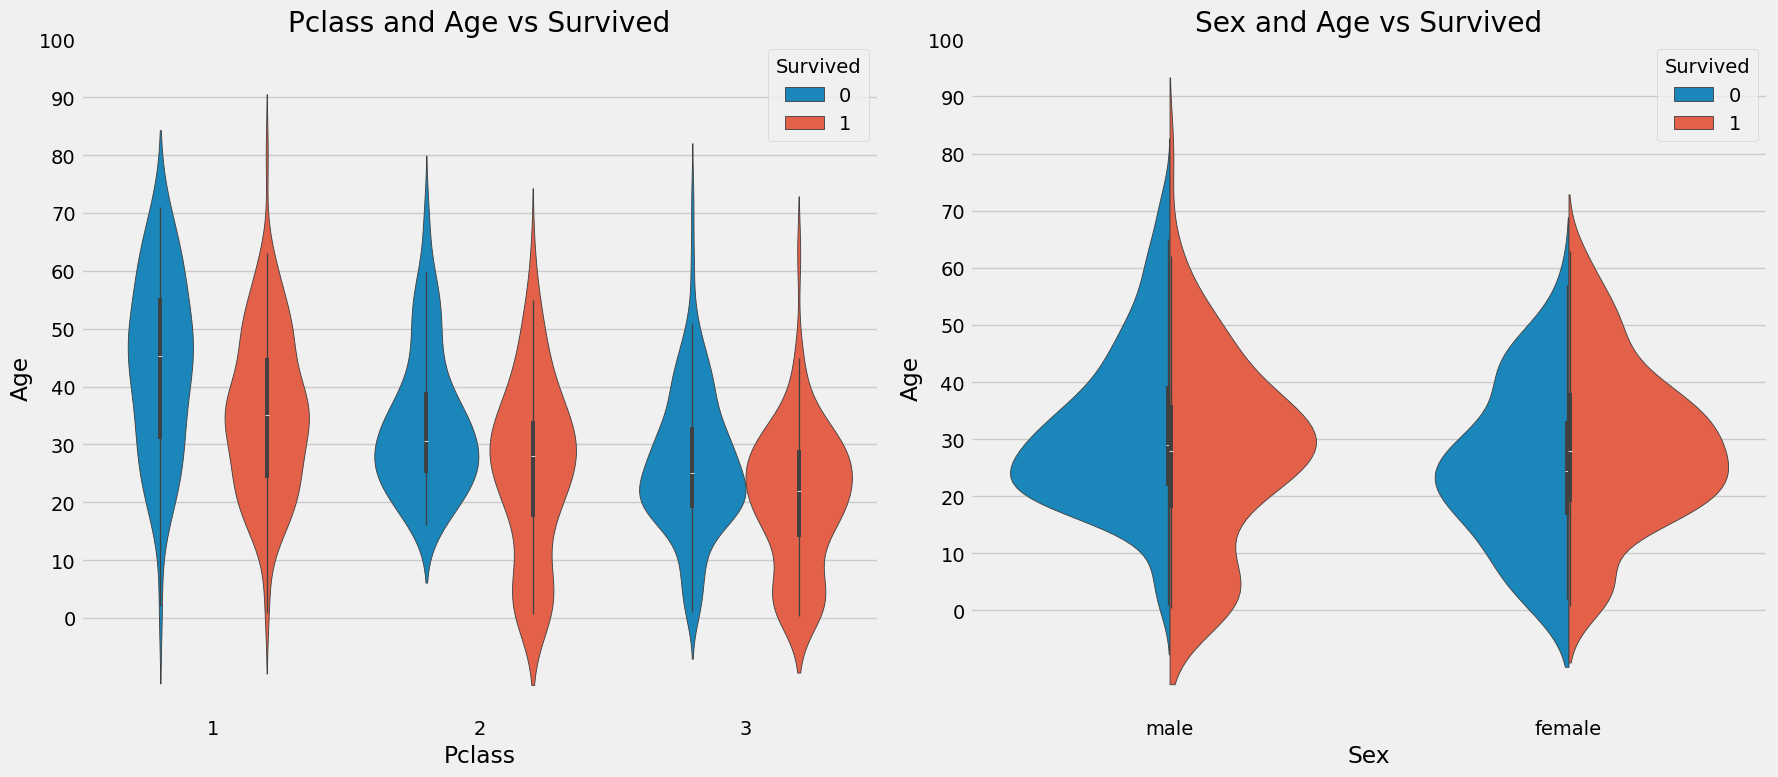

In [17]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # 110까지 10씩 증가 -> 100까지 출

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

f.tight_layout()
plt.show()

🔍 인사이트  
나이가 어린 어린이들은 Pclass와 관계없이 생존 확률이 높다.  
어린이를 먼저 구조했을 가능성이 높다.

Age 컬럼에는 총 177개의 결측치가 존재하며, 단순히 전체 평균으로 대체하는 방식은 부적절할 수 있다.  
예를 들어, 어린이에게 전체 평균 나이인 29세를 넣는 것은 비현실적이다.  
  
이를 보완하기 위해 Name 컬럼을 활용한 방법이 제안된다.  
Name에는 "Mr", "Mrs", "Miss", "Master" 등 호칭(title)이 포함되어 있어 승객의 성별과 대략적인 나이대를 유추할 수 있다.  
- "Mr"는 보통 성인 남성
- "Mrs"는 기혼 여성
- "Miss"는 미혼 여성 또는 어린 소녀
- "Master"는 어린 남자아이를 의미한다.

In [18]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

정규표현식 '([A-Za-z]+)\.' 의미  
(...): 괄호 안은 추출 대상 즉, 이 안에 해당되는 문자열을 뽑겠다는 뜻이다.  
  
`[A-Za-z]`: 대문자 AZ, 소문자 az 중 하나의 문자를 의미한다.  
`+`: 앞의 [A-Za-z]가 1개 이상 반복된다는 뜻이다.  
`\.`: .은 원래 정규식에서 "모든 문자"를 뜻하는 특수문자라서, 진짜 마침표(.)를 의미하려면 `\.`처럼 백슬래시로 이스케이프해야 한다.  
- "Smith, Mr. John" → 'Mr'
- "Brown, Mrs. Clara" → 'Mrs'

In [19]:
data.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
# .T 행과 열을 바꿔주는 역할

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


replace함수를 배울 때 딕셔너리 형식으로 배워서 리스트 형식의 변환에 대해 알아보았다.

✨ Tip  
- 리스트 방식  
→ 바꿀 값이 많고, 1:1 매칭이 깔끔하게 될 때  
→ 예: 호칭이나 라벨 등 규칙적으로 치환할 때  
→ ['A', 'B', 'C'], ['X', 'Y', 'Z']  
  
- 딕셔너리 방식  
→ 바꿀 값이 적고, 읽기 쉽게 표현하고 싶을 때  
→ 예: 몇 개만 특정 값으로 바꿔줄 때  
→ {'A': 'X', 'B': 'Y'}

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [23]:
## Assigning the NaN Values with the Ceil values of the mean ages
# for i in range(len(data['Age'])):
#     if data['Age'].isna().iloc[i]:  # Age가 NaN인 경우만 확인
#         if data['Initial'].iloc[i] == 'Mr':
#             data.loc[i, 'Age'] = 33
#         elif data['Initial'].iloc[i] == 'Mrs':
#             data.loc[i, 'Age'] = 36
#         elif data['Initial'].iloc[i] == 'Master':
#             data.loc[i, 'Age'] = 5
#         elif data['Initial'].iloc[i] == 'Miss':
#             data.loc[i, 'Age'] = 22
#         elif data['Initial'].iloc[i] == 'Other':
#             data.loc[i, 'Age'] = 46


data.loc[(data.Age.isna())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isna())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isna())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isna())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isna())&(data.Initial=='Other'),'Age']=46

=> 성능을 고려하면 벡터화된 코드가 훨씬 더 효율적이고 빠르기 때문에, 데이터의 크기가 크거나 성능이 중요한 경우에는 벡터화된 코드를 사용하는 것이 좋습니다.
반복문을 사용하는 방법은 작은 데이터셋이나 간단한 처리에 적합하지만, 성능이 중요한 상황에서는 벡터화를 사용하는 것이 더 나은 선택입니다.

벡터화(Vectorization)
- 데이터 처리에서 매우 중요한 개념으로, 데이터를 반복문 없이 한 번에 처리하는 방식  
-  특히, pandas와 같은 라이브러리에서 제공하는 벡터화된 연산은 반복문을 사용하는 것보다 훨씬 효율적  
- 벡터화는 성능 향상뿐만 아니라 코드의 간결성도 가져옴

✅isnull() vs isna() 차이점은?
  
isnull(): 원래부터 있었던 함수  
isna(): 나중에 추가된 더 직관적인 이름  

In [24]:
data.Age.isna().any()

False

In [25]:
data['Survived'].max()

1

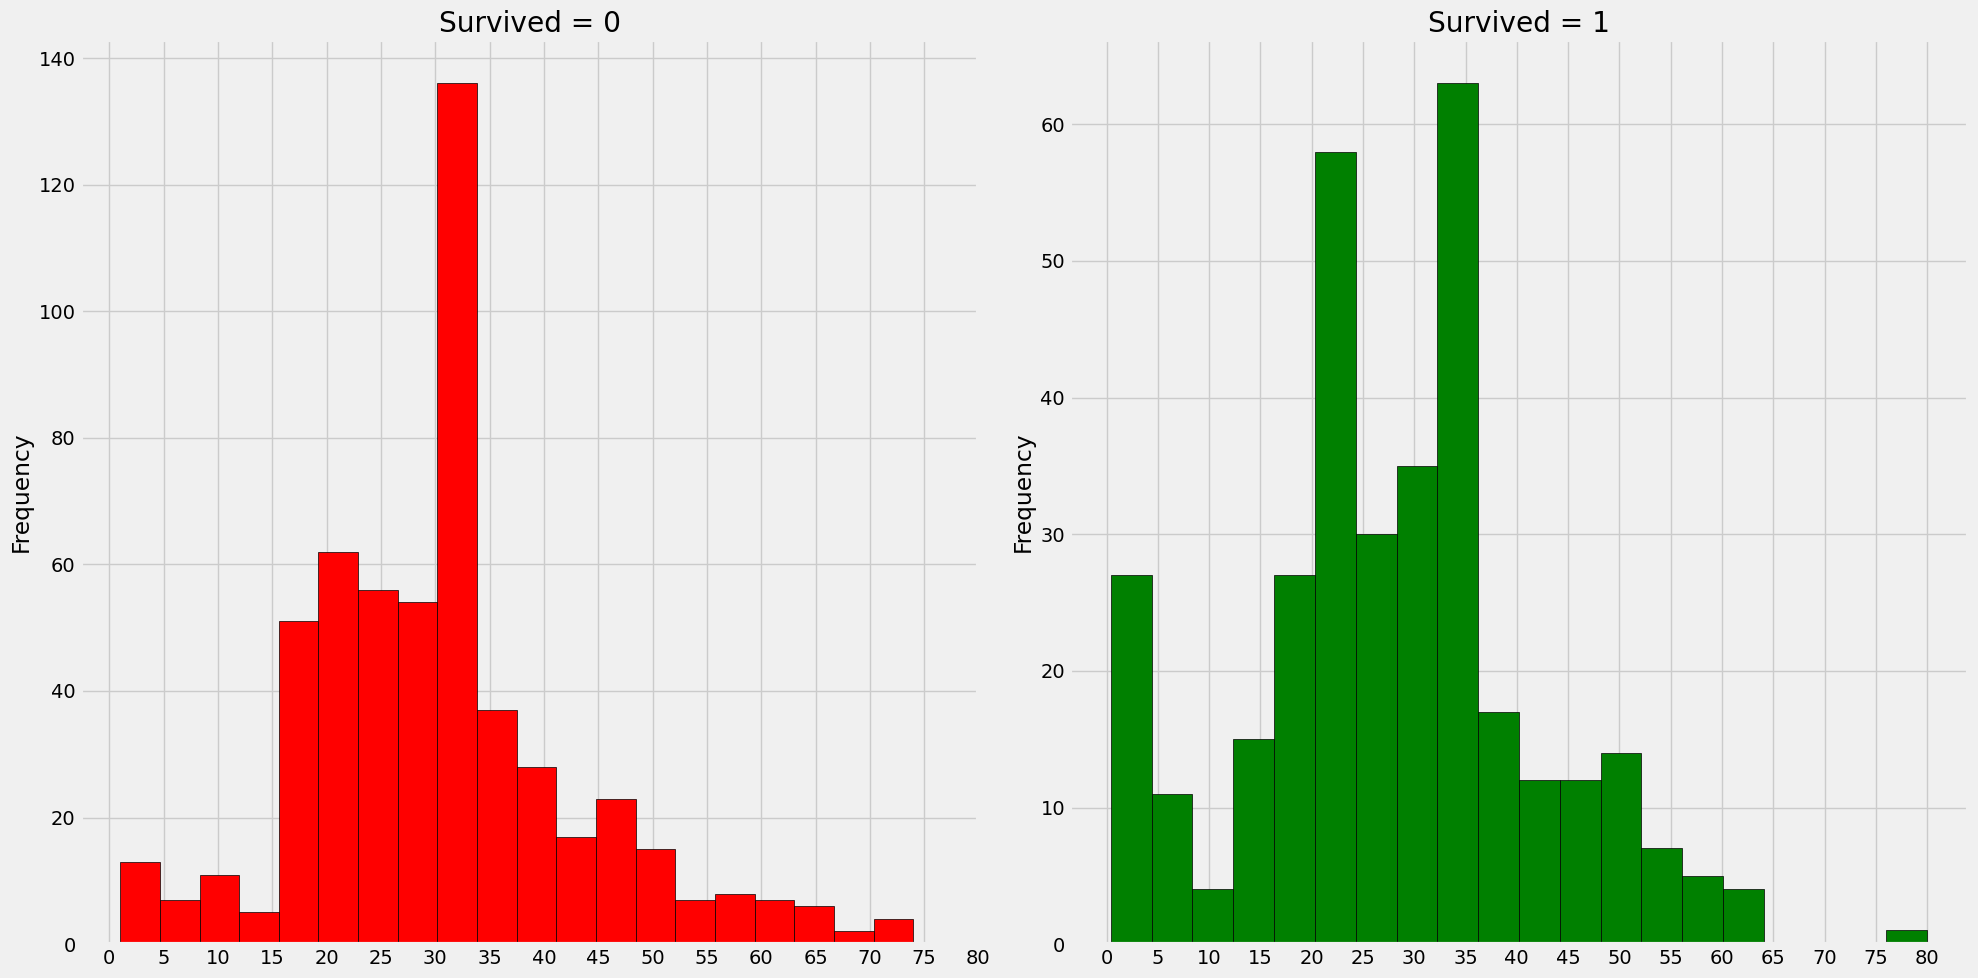

In [26]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x = list(range(0,85,5))
ax[0].set_xticks(x) # x축 구간

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2) # x축 구간

f.tight_layout()
plt.show()

Q. xticks 할 때 왜 range범위를 list()로 감싸는지?
  
range()는 이터레이터이기 때문에 인덱싱, 슬라이싱 등의 처리가 불가능  
set_xticks() 같은 함수는 보통 리스트 형태를 요구하므로 list()로 변환하는 것이 일반적

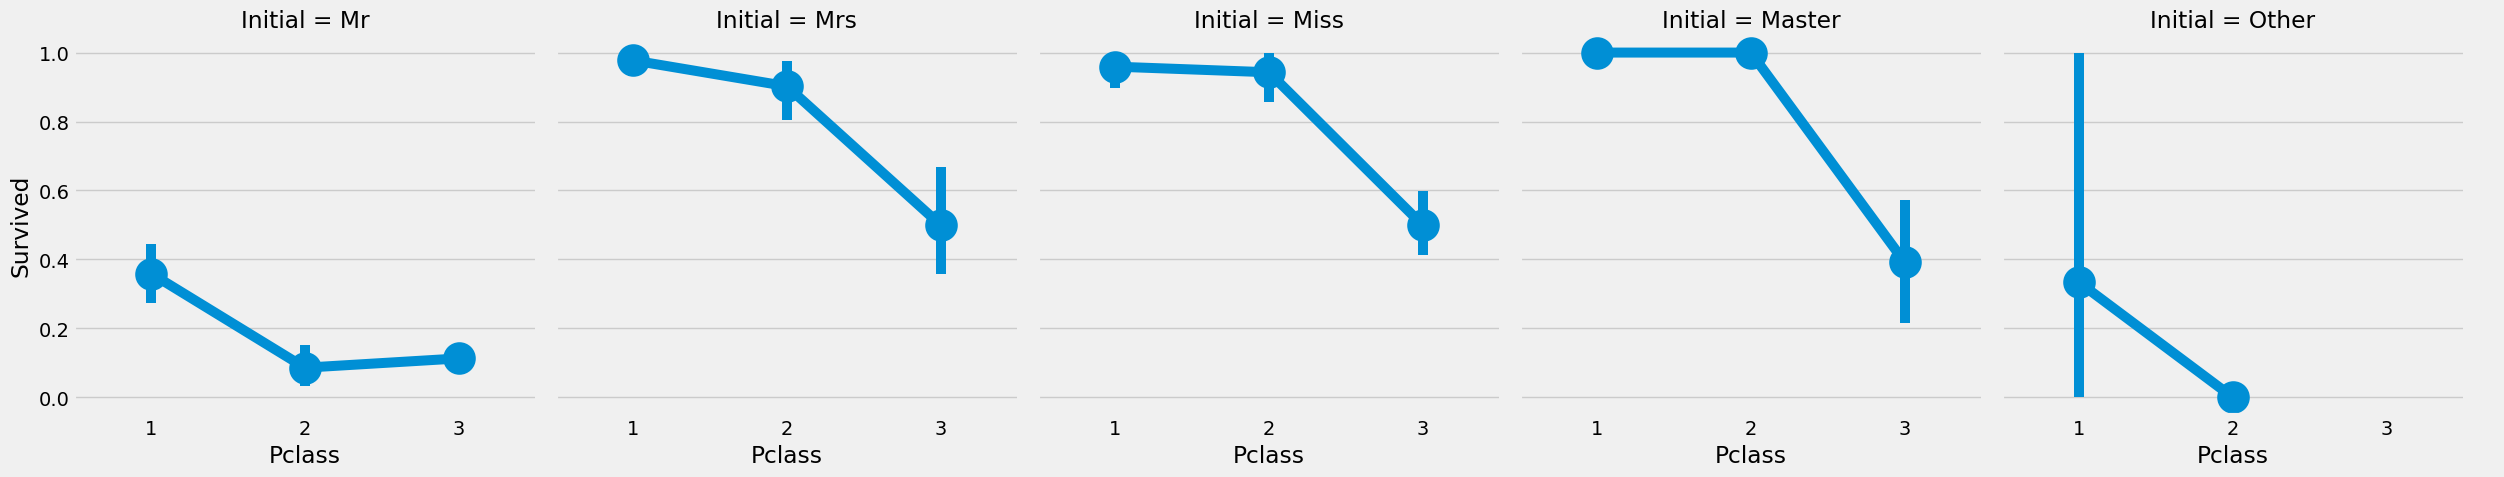

In [27]:
sns.catplot(x='Pclass',y='Survived', col='Initial', data=data, kind="point")
plt.show()

🔍 인사이트  
'여성 및 어린이 먼저' 정책은 계급에 관계없이 그대로 적용된다.

## Embarked--> Categorical Value

In [28]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [29]:
pd.crosstab([data.Embarked],[data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


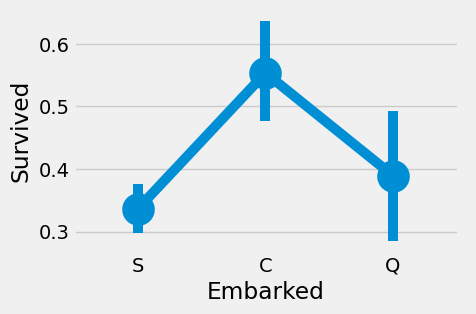

In [30]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf() # plt.gcf()는 현재 활성화된 matplotlib의 그림 객체(figure)를 가져온다.
# 이 객체는 그래프의 크기나 속성 등을 수정할 수 있게 해준다.
fig.set_size_inches(5,3)
plt.show()

🔍생존 수로만 보면 S 항구가 가장 많았지만,  
비율로 보니 C 항구가 생존 확률이 높고 S 항구가 생존 확률이 가장 낮다.

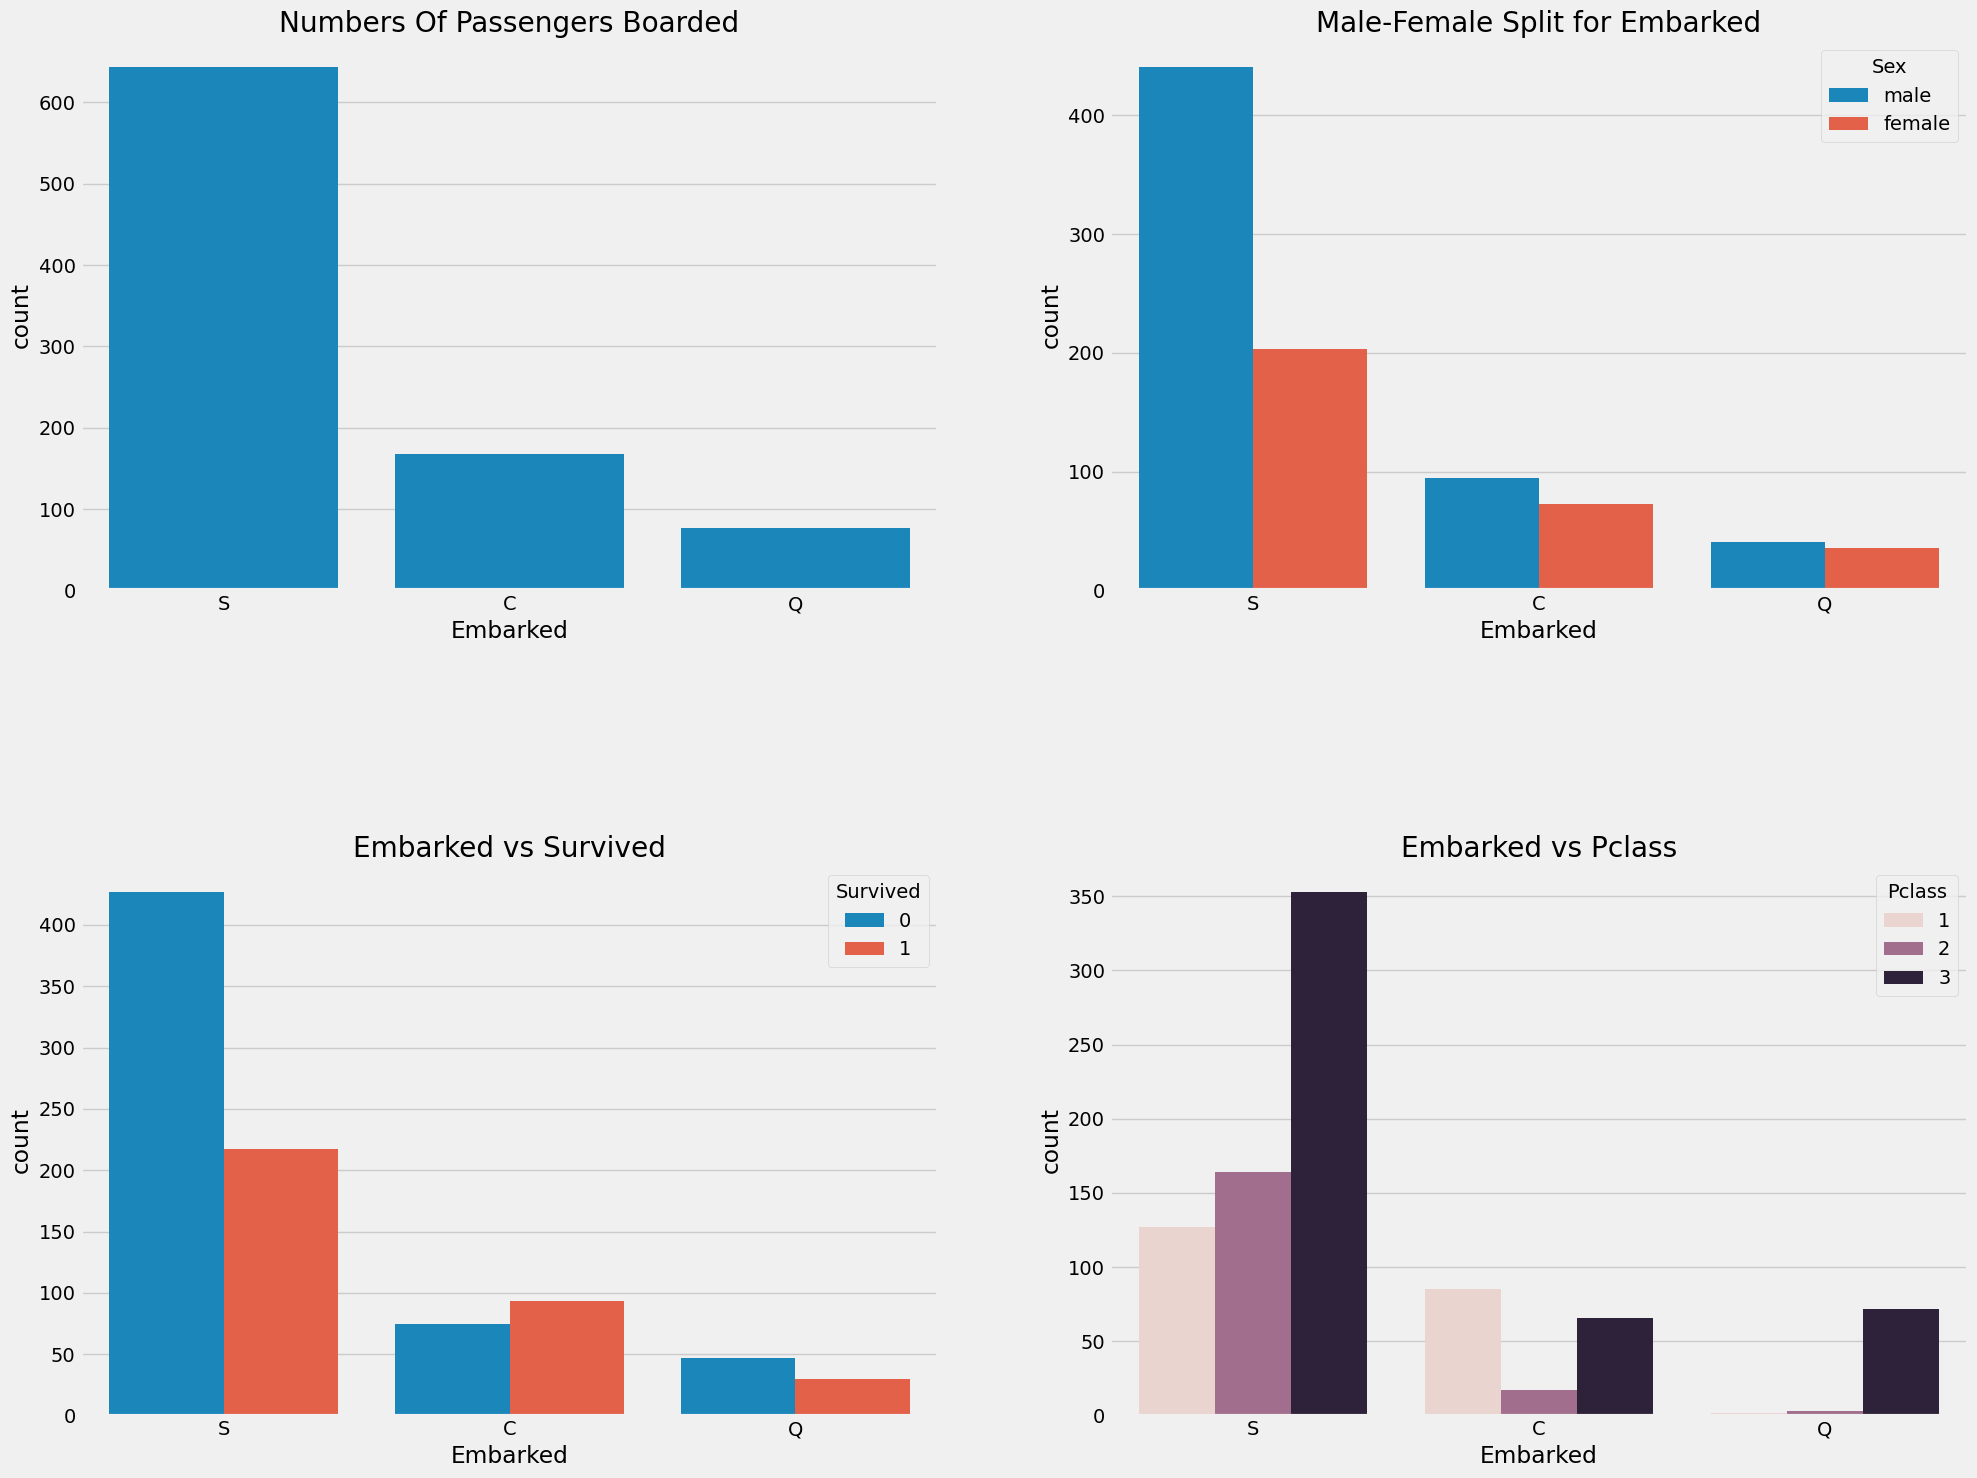

In [31]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Numbers Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

f.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- wspace → 서브플롯 사이의 가로 간격 (width space)  
값이 클수록 그래프들 사이의 가로 간격이 넓어집니다.
  
- hspace → 서브플롯 사이의 세로 간격 (height space)  
값이 클수록 그래프들 사이의 세로 간격이 넓어집니다.

📌 Observations (관찰 내용)  
S 항구에서 가장 많은 승객이 탑승했으며, 이들 중 대다수가 3등급(Pclass3) 승객이었다.

C 항구에서 탑승한 승객들은 상대적으로 생존율이 높았다.
→ 이는 1등급과 2등급 승객들이 구조된 경우가 많았기 때문일 수 있다.

S 항구는 부유한 사람들이 많이 탑승한 항구처럼 보인다.
→ 그럼에도 불구하고 생존율은 낮았는데, 이는 3등급 승객의 약 81%가 생존하지 못했기 때문이다.

Q 항구에서는 **승객의 약 95%가 3등급(Pclass3)**이었다.

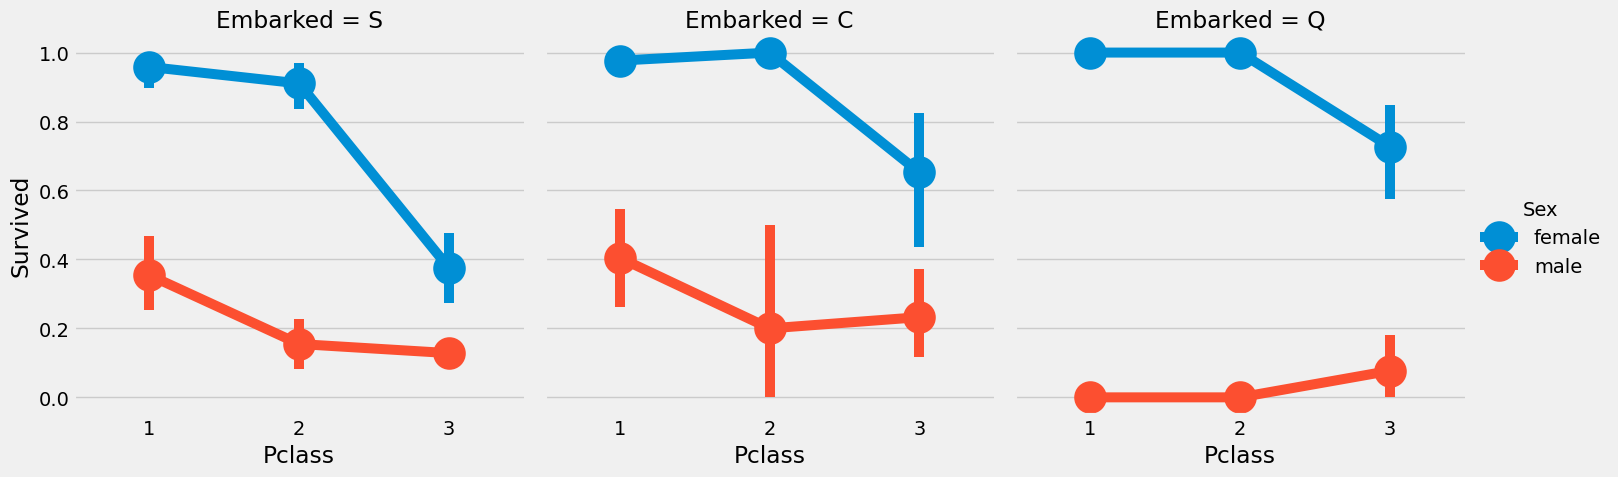

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

📌 Observations (관찰 내용)  
1등급(Pclass1) 및 2등급(Pclass2) 여성의 생존 확률은 거의 1에 가까우며, 이는 등급과 관계없이 여성이라는 점이 큰 영향을 미쳤음을 보여준다.

S 항구에서 출발한 3등급 승객(Pclass3) 은 매우 불운했으며,
→ 특히 남성과 여성 모두의 생존율이 매우 낮았다.  
→ 이는 "돈이 생존을 좌우했다(Money Matters)"는 점을 시사한다.

Q 항구는 남성들에게 가장 불운한 항구로 보인다.
→ 거의 모든 남성 승객이 3등급 승객이었고, 생존률도 낮았다.

## Filling Embarked NaN

In [33]:
data['Embarked'].fillna('S',inplace=True)
# 가장 많은 승객이 탑승한 S 항구(Port S) 로 대체함.

In [34]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature

In [35]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


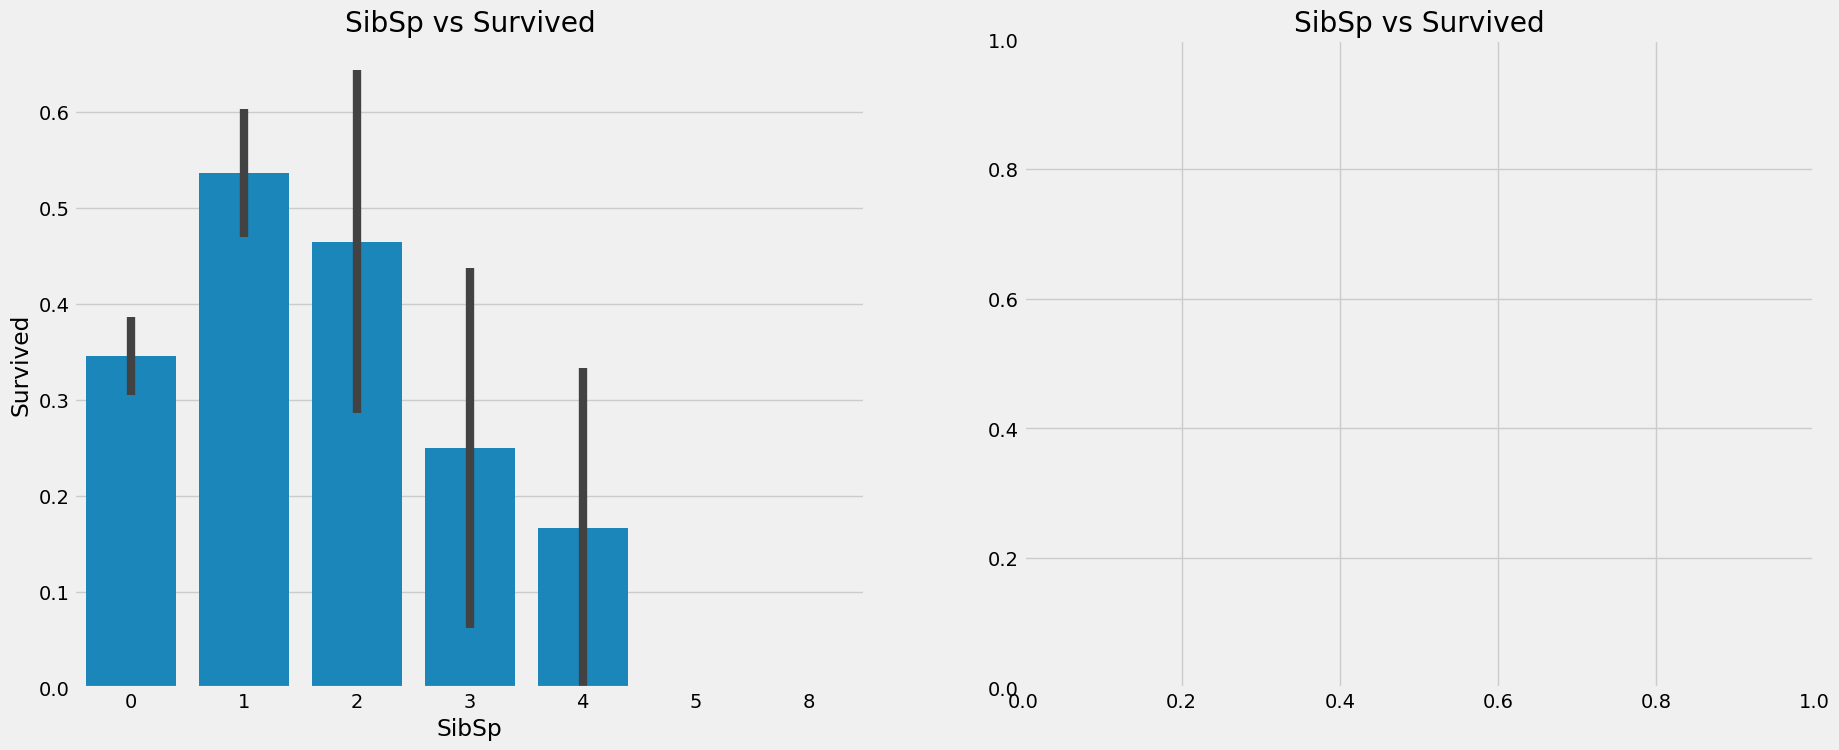

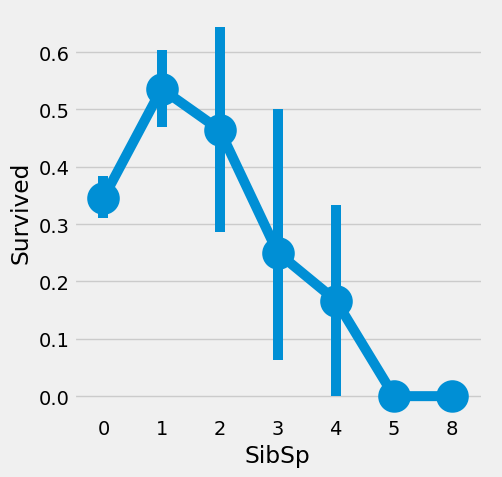

In [50]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
ax[1].set_title('SibSp vs Survived')

# plt.close(2) 이걸 하면 catplot 그래프 출력이 안 됨
plt.show()

In [51]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


📌 Observations (관찰 내용)  
- 형제자매의 수가 증가함에 따라 생존율은 대체로 감소하는 경향을 보인다.
놀랍게도 형제자매가 5명에서 8명인 가족의 생존율은 희박하다.
그 이유는 아마도 **Pclass** 때문일 수 있다.
- 교차표를 보면, **SibSp**가 4 이상의 사람들은 모두 **Pclass 3**에 속한 승객들이다.
그래서 Pclass 3에 속한 대가족들이 대부분 사망했다는 사실은 명백하다.

## Parch
#### 함께 탑승한 부모 또는 자녀 수

In [53]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


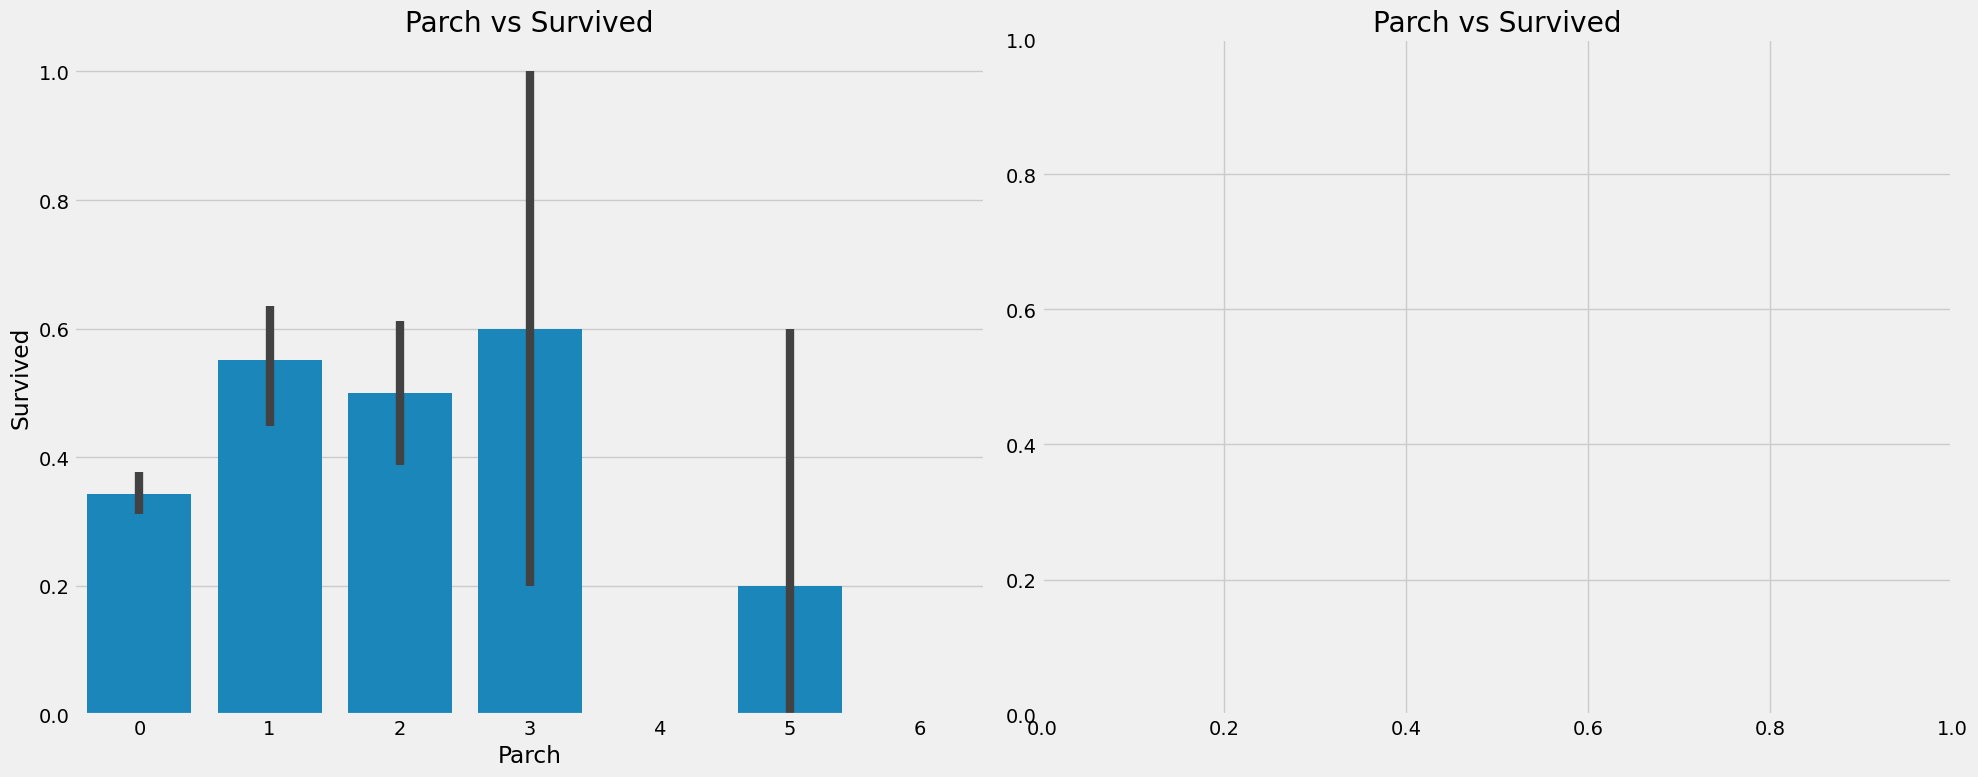

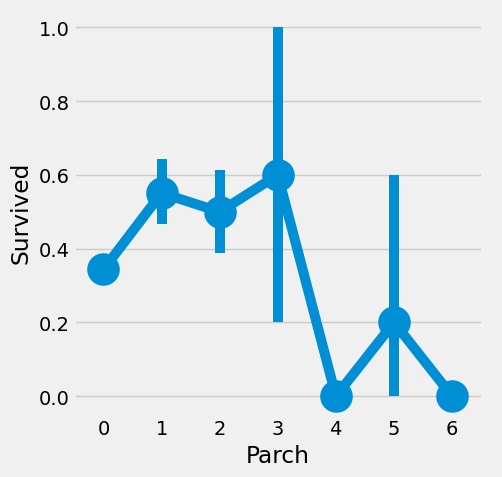

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Parch vs Survived')

f.tight_layout()
# plt.close(2)
plt.show()

📌 Observations (관찰 내용)
  
부모와 함께 승선한 승객들은 생존 가능성이 더 높다.  
그러나 부모의 수가 증가할수록 생존 가능성은 감소한다.  
  
부모가 1~3명 있는 경우 생존 확률이 높다.  
반면, 혼자 있는 경우에는 생존 가능성이 낮고, 4명 이상의 부모와 함께 있는 경우에는 생존 확률이 더욱 감소한다.

## Fare--> Continous Feature

In [66]:
print('Highest Fare was: ',data['Fare'].max(),)
print('Lowest Fare was: ',data['Fare'].min())
print('Average Fare was: ',round(data['Fare'].mean(), 2))

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2


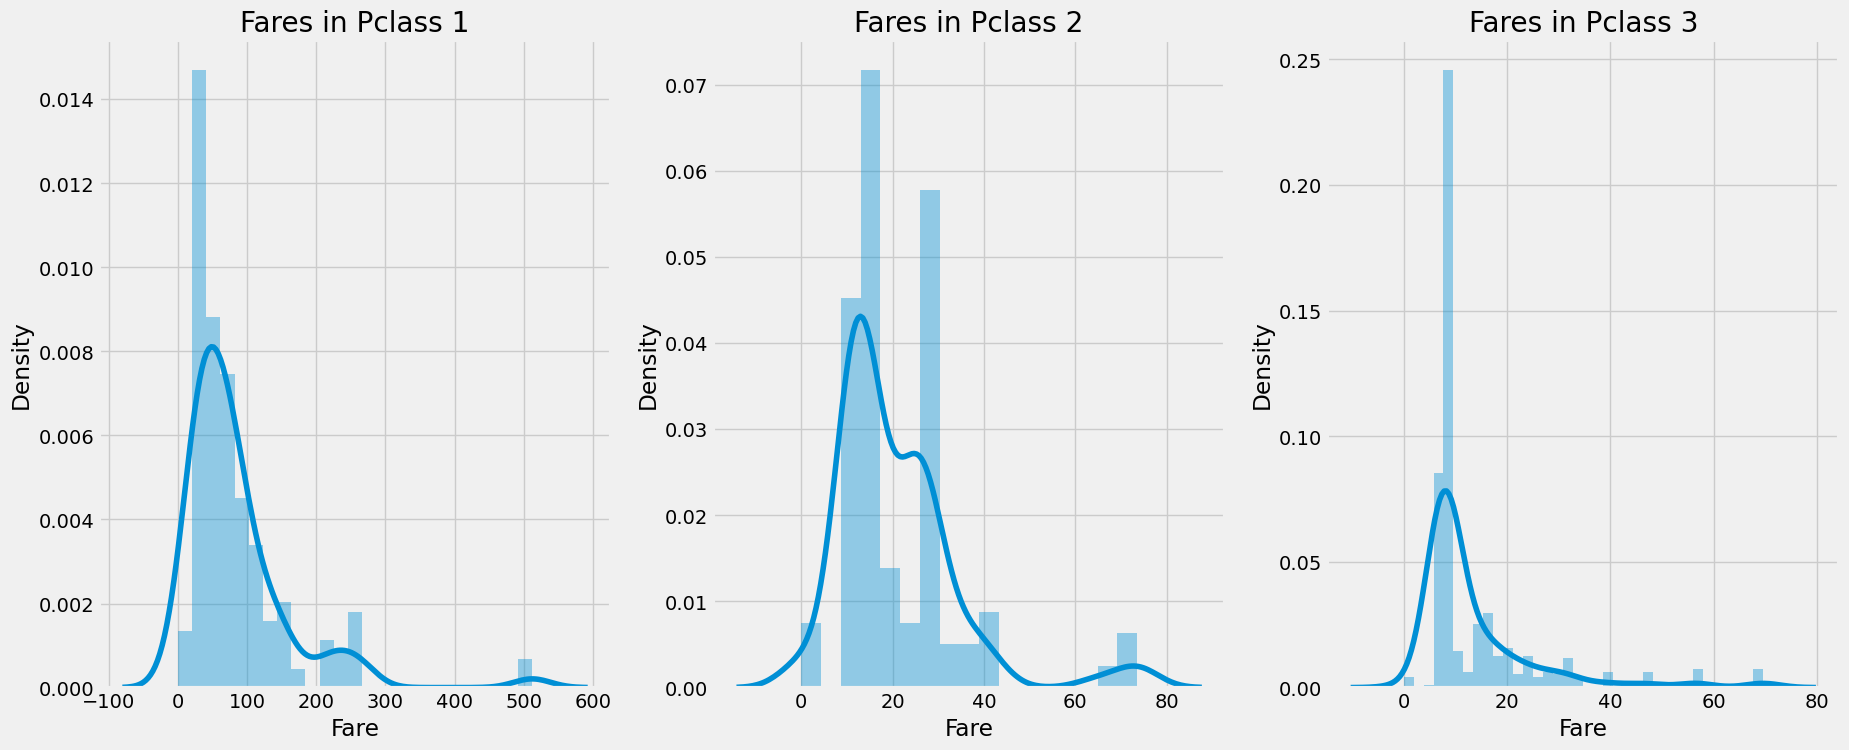

In [67]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### 📌 **관찰 내용**:
- **Fare Distribution**: **Pclass1** 승객들의 요금 분포가 매우 넓고, 이 분포는 계급이 낮아질수록 감소한다.  
요금은 연속적인 값이기 때문에 **Binning**을 사용해 이를 이산적인 값으로 변환할 수 있다.  
  
### **모든 특성에 대한 핵심 관찰**:

- **Sex**: 여성의 생존 확률이 남성에 비해 높다.
  
- **Pclass**: 1등석 승객이 생존 확률이 더 높은 경향이 있다.  
**Pclass3**의 생존율은 매우 낮다.  
여성의 경우 **Pclass1**에서 생존 확률이 거의 1에 가까우며, **Pclass2**에서도 생존 확률이 높다.  
돈이 중요한 역할을 한다!
  
- **Age**: 5-10세 미만의 어린이는 높은 생존 확률을 보였다. 15세에서 35세 사이의 승객은 많은 수가 사망했다. 
  
- **Embarked**: **C**에서 승객들의 생존 확률이 더 높아 보인다. 이는 **Pclass1** 승객의 대부분이 **S**에서 탔음에도 불구하고 그렇다. **Q** 항구에서 승객들은 대부분 **Pclass3**에 속했다.
  
- **Parch + SibSp**: 1-2명의 형제자매나 배우자, 또는 1-3명의 부모가 함께 승선한 경우 생존 확률이 더 높다.
  반면, 혼자 있거나 대가족을 동반한 경우 생존 확률이 낮다.


연속적인 값을 Binning을 사용해 이산적인 값으로 변환한다는 점을 예시로 이해해보려 찾아보았다.
  
예시)  
요금(Fare) 값이 10, 20, 35, 50, 100 등으로 매우 다양한 경우, Binning을 사용해 0-50, 50-100, 100 이상으로 나누면  
분석할 때 더 명확한 경향을 볼 수 있다.

## Correlation Between The Features

In [71]:
# data

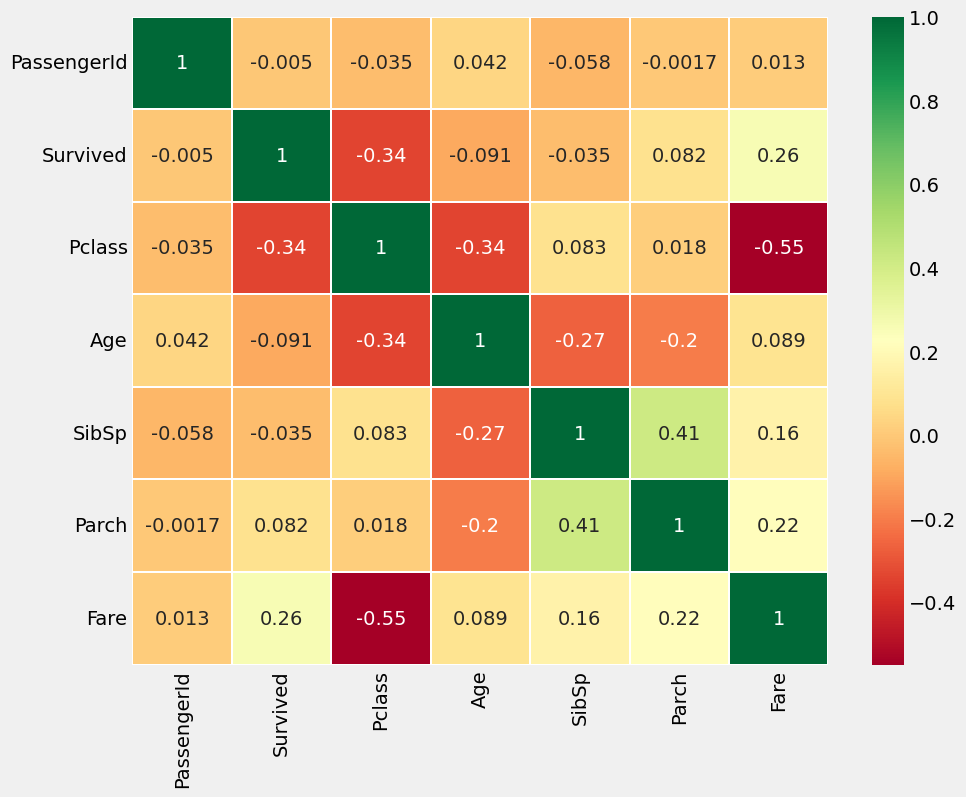

In [73]:
numeric_data = data.select_dtypes(include=['number']) # corr()할 때 object형도 있으므로 error 발생

sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) # annot=True 상관계수를 표시
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

🔍 상관 행렬(Heatmap) 해석  
우선 주목할 점은, 상관 행렬은 숫자형 특성(numeric features)만 비교한다는 것이다.  
알파벳이나 문자열은 수치적으로 상관 관계를 계산할 수 없기 때문이다.  
  
상관 관계를 이해하기 전에, 먼저 상관 관계가 무엇인지 짚고 넘어가겠다.  
✅ 양의 상관관계 (Positive Correlation)  
특성 A가 증가할 때 특성 B도 증가한다면, 두 특성은 양의 상관관계에 있다고 본다.  
값이 1이면 완벽한 양의 상관관계를 의미한다.  
  
❌ 음의 상관관계 (Negative Correlation)  
특성 A가 증가할 때 특성 B는 감소한다면, 두 특성은 음의 상관관계에 있다고 본다.  
값이 -1이면 완벽한 음의 상관관계를 의미한다.  